In [1]:
import numpy as np
import scipy 

import matplotlib.pyplot as plt

import class_diag_hamiltonian as diag_heff
import class_energy as energy
import class_mass_size as mass_size

In [2]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3) #.set_visible(False)

    #axs[0, 0].set_theta_zero_location('E')
    #lines, labels = axs[0, 0].set_thetagrids((0, 45, 90, 135, 180), (r'0', ' ', r'$\pi/2$', ' ', r'$\pi$'))


In [3]:
def plot_comp_wf(psi1, psi2, exc_number, image_name):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 25

    fig = plt.figure(figsize=(15,10), facecolor='white')
    ax = plt.gca()

    ax1 = ax.twinx()
    
    p1, = ax.plot(psi1[0].real, linewidth=0.9, color='tab:blue')
    p1, = ax.plot(psi2.real, linewidth=0.9, color='tab:green', label=r'Reference GS')
    
    for i in range(1,exc_number):
        p0, = ax1.plot(psi1[i].real, linewidth=0.9)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6, fontsize=font_size)
    ax.tick_params(axis='x', direction='in', top=True, length=8, labelsize=font_size)
    ax.tick_params(axis='y', direction='in', right=False, length=8, labelsize=font_size)
    ax.tick_params(which='minor', axis='y', direction='in', right=False)
    
    ax.set_xlabel(r'Angle Grid $\phi$', fontsize=font_size)
    ax.set_ylabel(r'Wavefunction $\psi(\phi)$', fontsize=font_size)

    #ax1.legend(loc='upper center', bbox_to_anchor=(0.3+0.1, 1.15), ncol=1, fontsize=font_size)
    ax1.tick_params(axis='y', colors=p1.get_color(), direction='in', right=True, length=8, labelsize=font_size)
    ax1.tick_params(which='minor', axis='y', direction='in', right=True)
    ax1.yaxis.label.set_color(p1.get_color())

    plt.savefig(image_name+'.pdf', dpi=400, bbox_inches='tight')

### Create Param Object and read reference configuration

In [4]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"converge_new_lattice": "no",
"My": 6,
"B": 1.0,
"tx": 90,
"ty": 100,
"V_0": 80.0,
"qx": 0,
"qy": 0,
"init_choice": " ",
"external_wf_tag": " ",
"excitation_no": 11,
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-12}

x = (2*np.pi/params["n"])*np.arange(params["n"])

Mx = params["Mx"]
My = params["My"]

n = params["n"]

tx = params["tx"]
ty = params["ty"]

B = params["B"]

scale = B 

exc_number = params["excitation_no"]

#ferro_order = np.load('matrix_results/psi_rotors_2d_python_M_10000_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0/psi_rotors_2d_imag_time_prop_M_10000_Mx_100_My_100_B_1.0_tx_90.0_ty_100.0_Vmin_10.0_Vmax_180.0_qx_0_qy_0_dt_0.001_init_uniform_V0_40.0.npy')
ref_state = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_uniform_V0_80.0.npy')
ref_state_fdv = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_ferro_domain_vertical_wall_V0_80.0.npy')
ref_state_fdh = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_ferro_domain_horizontal_wall_V0_80.0.npy')
ref_state_sp = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_80.0_Vmax_80.0_qx_0_qy_0_dt_0.001_init_small_polaron_V0_80.0.npy')

#ref_state = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_uniform_V0_110.0.npy')
#ref_state_fdv = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_ferro_domain_vertical_wall_V0_110.0.npy')
#ref_state_fdh = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_ferro_domain_horizontal_wall_V0_110.0.npy')
#ref_state_sp = np.load('matrix_results/psi_rotors_2d_python_M_36_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0/psi_rotors_2d_imag_time_prop_M_36_Mx_6_My_6_B_1.0_tx_90.0_ty_100.0_Vmin_110.0_Vmax_110.0_qx_0_qy_0_dt_0.001_init_small_polaron_V0_110.0.npy')

results_path = 'image_results/MRCI_M_36_B_1.0_tx_90_ty_100_V_80/excitation_analysis/'

Verify the reference configurations

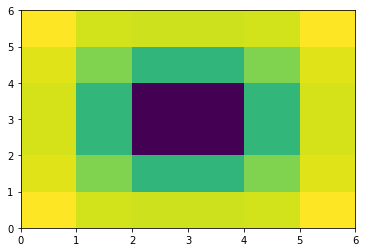

In [5]:
polaron_size_object = mass_size.polaron_size(params=params)

ref_state_sigma = polaron_size_object.calc_polaron_size(ref_state, '1')
plt.pcolormesh(ref_state_sigma)

### Correct the ref states with a SCF optimization

In [6]:
coupl_object = energy.coupling_of_states(params=params)
diag_object = diag_heff.diagonalization(params=params)
mult_ref_object = diag_heff.multi_ref_ci(params=params)

q = np.array([params['qx'],params['qy']])

iter_number = 50
mult_ref_object.set_phase_bool = True

new_ref_gs, conv_energ_gs, overlap_arr = mult_ref_object.creat_new_ref_state(iter_number, ref_state, q)
new_ref_gs_fdv, conv_energ_gs_fdv, overlap_arr_fdv = mult_ref_object.creat_new_ref_state(iter_number, ref_state_fdv, q)
new_ref_gs_fdh, conv_energ_gs_fdh, overlap_arr_fdh = mult_ref_object.creat_new_ref_state(iter_number, ref_state_fdh, q)
new_ref_gs_sp, conv_energ_gs_sp, overlap_arr_sp = mult_ref_object.creat_new_ref_state(iter_number, ref_state_sp, q)

Iter = 0 , Overlap = (0.9999999996910781+4.852627212935344e-13j)
Iter = 1 , Overlap = (0.999999999700352-8.51718199701201e-14j)
Iter = 2 , Overlap = (0.9999999997071655-4.493126097534656e-13j)
Iter = 3 , Overlap = (0.9999999997141716-8.667181575223924e-14j)
Iter = 4 , Overlap = (0.9999999997207316+9.443982636148871e-14j)
Iter = 5 , Overlap = (0.9999999997272904+1.1411927789306932e-13j)
Iter = 6 , Overlap = (0.9999999997335741+6.12284777691666e-15j)
Iter = 7 , Overlap = (0.9999999997397897-4.11260545826985e-14j)
Iter = 8 , Overlap = (0.9999999997458056-1.4829508328262913e-14j)
Iter = 9 , Overlap = (0.9999999997517198+1.1750554392214159e-14j)
Iter = 10 , Overlap = (0.999999999757465+9.38241711858202e-15j)
Iter = 11 , Overlap = (0.9999999997631105+9.804374924492956e-16j)
Iter = 12 , Overlap = (0.9999999997685861-2.023244978674093e-15j)
Iter = 13 , Overlap = (0.9999999997739671-1.5744317602948237e-15j)
Iter = 14 , Overlap = (0.9999999997791951+5.126898688156225e-16j)
Iter = 15 , Overlap = 

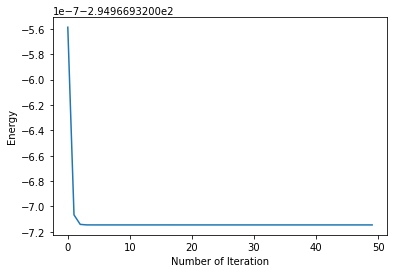

In [10]:
plt.plot(conv_energ_gs_sp.real)

plt.xlabel(r'Number of Iteration')
plt.ylabel(r'Energy')

plt.savefig(results_path+'1_energy_sp.pdf')

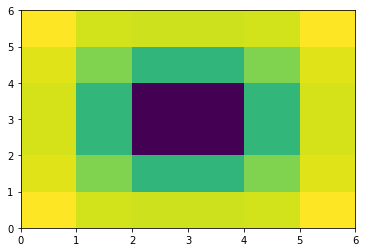

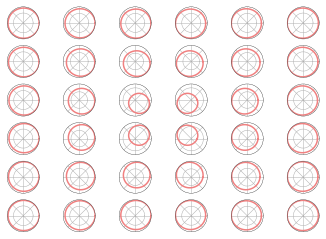

In [11]:
state_to_plot = ref_state

ref_state_sigma = polaron_size_object.calc_polaron_size(state_to_plot, '1')
plt.pcolormesh(ref_state_sigma)

plot_rotor_wavefunction(x, My, Mx, np.abs(state_to_plot)**2)

### Create Single-Excitation Objects from the new reference states

In [12]:
energy_exc_states, ref_exc_states = diag_object.diag_h_eff(new_ref_gs)
energy_exc_states_fdv, ref_exc_states_fdv = diag_object.diag_h_eff(new_ref_gs_fdv)
energy_exc_states_fdh, ref_exc_states_fdh = diag_object.diag_h_eff(new_ref_gs_fdh)
energy_exc_states_sp, ref_exc_states_sp = diag_object.diag_h_eff(new_ref_gs_sp)

Exc Energies (1,1) = [-61.34468783+0.j -49.26629479+0.j -37.35281078+0.j -25.88268137+0.j
 -14.48964599+0.j  -3.65529117+0.j   7.14241556+0.j  17.32366741+0.j
  27.40283574+0.j  36.87548155+0.j]
Exc Energies (0,2) = [ 1.        +0.j  1.00002077+0.j  4.        +0.j  4.0000032 +0.j
  9.        +0.j  9.00000064+0.j 16.        +0.j 16.00000012+0.j
 25.        +0.j 25.00000002+0.j]
Exc Energies (2,0) = [ 1.        +0.j  1.00002789+0.j  4.        +0.j  4.0000043 +0.j
  9.        +0.j  9.00000086+0.j 16.        +0.j 16.00000016+0.j
 25.        +0.j 25.00000002+0.j]
Exc Energies (2,2) = [ 1.+0.j  1.+0.j  4.+0.j  4.+0.j  9.+0.j  9.+0.j 16.+0.j 16.+0.j 25.+0.j
 25.+0.j]

Diff Exc Energies (1,1) = [12.07839304+0.j 11.91348402+0.j 11.47012941+0.j 11.39303538+0.j
 10.83435482+0.j 10.79770673+0.j 10.18125186+0.j 10.07916833+0.j
  9.47264582+0.j]
Diff Exc Energies (0,2) = [2.07654293e-05+0.j 2.99997923e+00+0.j 3.20038477e-06+0.j
 4.99999680e+00+0.j 6.37944378e-07+0.j 6.99999936e+00+0.j
 1.17501815e-0

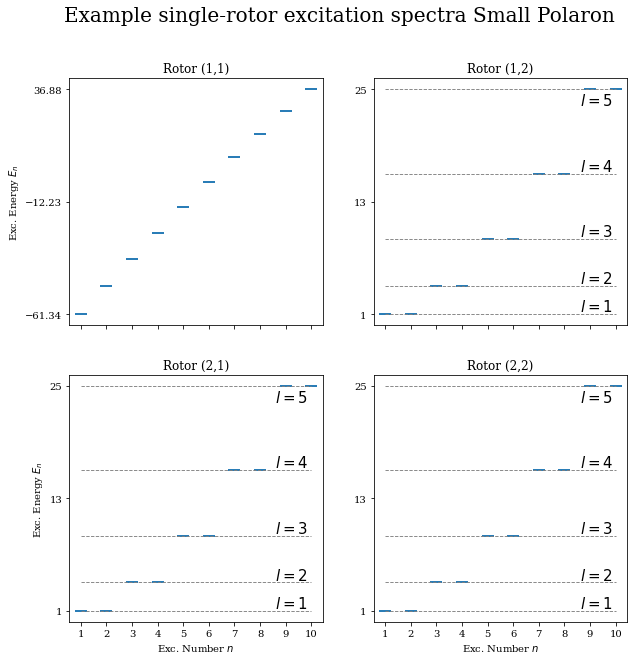

In [17]:
exc_energies_to_plot = energy_exc_states_sp

print('Exc Energies (1,1) =', exc_energies_to_plot[0,0][1:])
print('Exc Energies (0,2) =', exc_energies_to_plot[0,1][1:])
print('Exc Energies (2,0) =', exc_energies_to_plot[1,0][1:])
print('Exc Energies (2,2) =', exc_energies_to_plot[1,1][1:])

print('\nDiff Exc Energies (1,1) =', np.diff(exc_energies_to_plot[0,0][1:]))
print('Diff Exc Energies (0,2) =', np.diff(exc_energies_to_plot[0,1][1:]))
print('Diff Exc Energies (2,0) =', np.diff(exc_energies_to_plot[1,0][1:]))
print('Diff Exc Energies (2,2) =', np.diff(exc_energies_to_plot[1,1][1:]))

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(10,10)) 
gs = fig.add_gridspec(2,2, hspace=0.2, wspace=0.2)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Example single-rotor excitation spectra Small Polaron', fontsize=20)

axs[0,0].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[0,0][1:].real, marker="_", s=130, linewidth=1.9)
axs[0,1].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[0,1][1:].real, marker="_", s=130, linewidth=1.9)
axs[1,0].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[1,0][1:].real, marker="_", s=130, linewidth=1.9)
axs[1,1].scatter(np.arange(exc_number-1)+1, exc_energies_to_plot[1,1][1:].real, marker="_", s=130, linewidth=1.9)

axs[0,1].hlines(y=1, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=4, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=9, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=16, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[0,1].hlines(y=25, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')

axs[1,0].hlines(y=1, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=4, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=9, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=16, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,0].hlines(y=25, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')

axs[1,1].hlines(y=1, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=4, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=9, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=16, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')
axs[1,1].hlines(y=25, xmin=1, xmax=exc_number-1, linewidth=0.9, linestyle='dashed', color='grey')

axs[0,1].text(x=exc_number-2.4, y=1.3, s=r'$l=1$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=4.3, s=r'$l=2$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=9.3, s=r'$l=3$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=16.3, s=r'$l=4$', fontsize=15)
axs[0,1].text(x=exc_number-2.4, y=23.3, s=r'$l=5$', fontsize=15)

axs[1,0].text(x=exc_number-2.4, y=1.3, s=r'$l=1$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=4.3, s=r'$l=2$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=9.3, s=r'$l=3$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=16.3, s=r'$l=4$', fontsize=15)
axs[1,0].text(x=exc_number-2.4, y=23.3, s=r'$l=5$', fontsize=15)

axs[1,1].text(x=exc_number-2.4, y=1.3, s=r'$l=1$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=4.3, s=r'$l=2$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=9.3, s=r'$l=3$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=16.3, s=r'$l=4$', fontsize=15)
axs[1,1].text(x=exc_number-2.4, y=23.3, s=r'$l=5$', fontsize=15)

axs[0,0].set_title(r'Rotor (1,1)')
axs[0,1].set_title(r'Rotor (1,2)')
axs[1,0].set_title(r'Rotor (2,1)')
axs[1,1].set_title(r'Rotor (2,2)')

axs[0,0].set_ylabel(r'Exc. Energy $E_n$')
axs[1,0].set_ylabel(r'Exc. Energy $E_n$')
axs[1,0].set_xlabel(r'Exc. Number $n$')
axs[1,1].set_xlabel(r'Exc. Number $n$')

axs[0,0].set_xticks((np.arange(exc_number-1)+1).tolist())
axs[0,0].set_yticks([exc_energies_to_plot[0,0][1:][0].real, (np.max(exc_energies_to_plot[0,0][1:].real)+exc_energies_to_plot[0,0][1:][0].real)/2, np.max(exc_energies_to_plot[0,0][1:].real)])
axs[0,1].set_yticks([exc_energies_to_plot[0,1][1:][0].real, (np.max(exc_energies_to_plot[0,1][1:].real)+exc_energies_to_plot[0,1][1:][0].real)/2, np.max(exc_energies_to_plot[0,1][1:].real)])
axs[1,0].set_yticks([exc_energies_to_plot[1,0][1:][0].real, (np.max(exc_energies_to_plot[1,0][1:].real)+exc_energies_to_plot[1,0][1:][0].real)/2, np.max(exc_energies_to_plot[1,0][1:].real)])
axs[1,1].set_yticks([exc_energies_to_plot[1,1][1:][0].real, (np.max(exc_energies_to_plot[1,1][1:].real)+exc_energies_to_plot[1,1][1:][0].real)/2, np.max(exc_energies_to_plot[1,1][1:].real)])

plt.savefig(results_path+'single_excitation_spectra_small_polaron.svg')

### Visualization of effective Hamiltonian and States

min V_eff 1 = (-80.00003504794383+5.037349156235814e-16j)
max V_eff 1 = (79.9999656714482+6.712786602277349e-17j)

min V_eff 2 = (-0.000204471982587689-1.990757520062796e-15j)
max V_eff 2 = (-3.231034506082207e-05+3.26358869198904e-18j)

min V_eff 3 = (-0.00022746015371430536-2.33302471299715e-15j)
max V_eff 3 = (-2.782204119992363e-05-1.8477204461958244e-17j)

min V_eff 4 = (-6.0875308211790815e-05+2.901591481257922e-17j)
max V_eff 4 = (-5.9989420224759664e-05-1.3600439318385907e-17j)


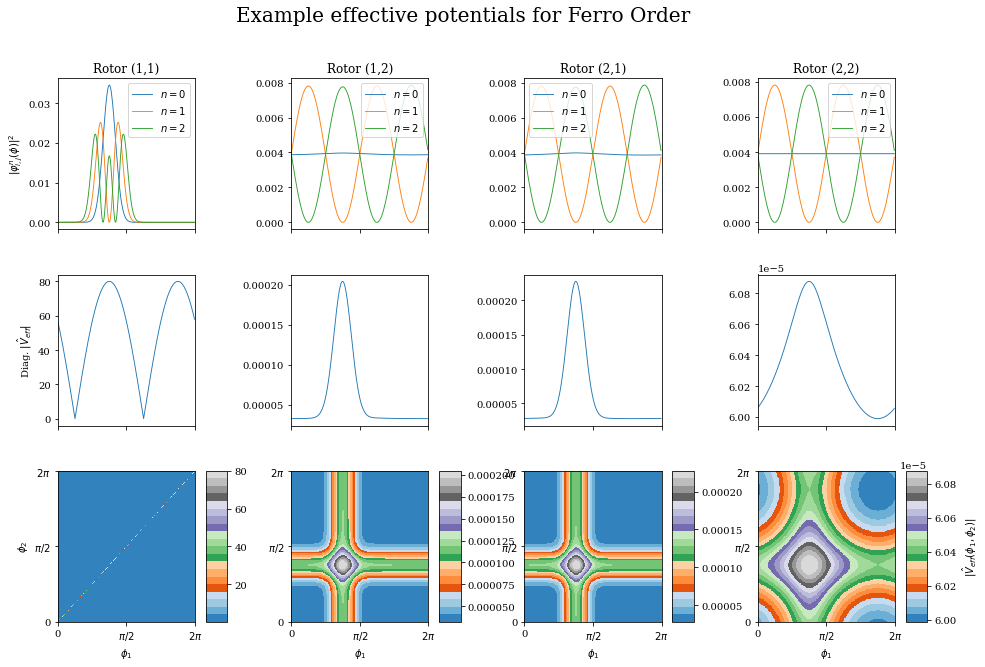

In [46]:
ref_state_to_plot = new_ref_gs_sp
exc_state_to_plot = ref_exc_states_sp

index_i1 = 0 # rotor index along My
index_j1 = 0 # rotor index along Mx

index_i2 = 0 # rotor index along My
index_j2 = 1 # rotor index along Mx

index_i3 = 1 # rotor index along My
index_j3 = 0 # rotor index along Mx

index_i4 = 1 # rotor index along My
index_j4 = 1 # rotor index along Mx

V_psi1 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i1, index_j1)
V_psi2 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i2, index_j2)
V_psi3 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i3, index_j3)
V_psi4 = diag_object.single_rotor_eff_potential(ref_state_to_plot, index_i4, index_j4)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(15,10)) 
gs = fig.add_gridspec(3,4, hspace=0.3, wspace=0.7)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Example effective potentials for Small Polaron', fontsize=20)

axs[0,0].set_title(r'Rotor ('+str(index_i1+1)+r','+str(index_j1+1)+r')')
axs[0,1].set_title(r'Rotor ('+str(index_i2+1)+r','+str(index_j2+1)+r')')
axs[0,2].set_title(r'Rotor ('+str(index_i3+1)+r','+str(index_j3+1)+r')')
axs[0,3].set_title(r'Rotor ('+str(index_i4+1)+r','+str(index_j4+1)+r')')

axs[0,0].plot(np.abs(exc_state_to_plot[index_i1, index_j1, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,0].plot(np.abs(exc_state_to_plot[index_i1, index_j1, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,0].plot(np.abs(exc_state_to_plot[index_i1, index_j1, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[0,1].plot(np.abs(exc_state_to_plot[index_i2, index_j2, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,1].plot(np.abs(exc_state_to_plot[index_i2, index_j2, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,1].plot(np.abs(exc_state_to_plot[index_i2, index_j2, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[0,2].plot(np.abs(exc_state_to_plot[index_i3, index_j3, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,2].plot(np.abs(exc_state_to_plot[index_i3, index_j3, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,2].plot(np.abs(exc_state_to_plot[index_i3, index_j3, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[0,3].plot(np.abs(exc_state_to_plot[index_i4, index_j4, 0])**2, linewidth=0.9, label=r'$n=0$')
axs[0,3].plot(np.abs(exc_state_to_plot[index_i4, index_j4, 1])**2, linewidth=0.9, label=r'$n=1$')
axs[0,3].plot(np.abs(exc_state_to_plot[index_i4, index_j4, 2])**2, linewidth=0.9, label=r'$n=2$')

axs[1,0].plot(np.abs(V_psi1).diagonal(), linewidth=0.9)
axs[1,1].plot(np.abs(V_psi2).diagonal(), linewidth=0.9)
axs[1,2].plot(np.abs(V_psi3).diagonal(), linewidth=0.9)
axs[1,3].plot(np.abs(V_psi4).diagonal(), linewidth=0.9)

pc1 = axs[2,0].pcolormesh(np.abs(V_psi1), cmap='tab20c', linewidth=0, rasterized=True)
pc2 = axs[2,1].pcolormesh(np.abs(V_psi2), cmap='tab20c', linewidth=0, rasterized=True)
pc3 = axs[2,2].pcolormesh(np.abs(V_psi3), cmap='tab20c', linewidth=0, rasterized=True)
pc4 = axs[2,3].pcolormesh(np.abs(V_psi4), cmap='tab20c', linewidth=0, rasterized=True)
pc1.set_edgecolor('face')
pc2.set_edgecolor('face')
pc3.set_edgecolor('face')
pc4.set_edgecolor('face')

cax1 = fig.add_axes([axs[2,0].get_position().x1+0.01,axs[2,0].get_position().y0,0.02,axs[2,0].get_position().height])
cax2 = fig.add_axes([axs[2,1].get_position().x1+0.01,axs[2,1].get_position().y0,0.02,axs[2,1].get_position().height])
cax3 = fig.add_axes([axs[2,2].get_position().x1+0.01,axs[2,2].get_position().y0,0.02,axs[2,2].get_position().height])
cax4 = fig.add_axes([axs[2,3].get_position().x1+0.01,axs[2,3].get_position().y0,0.02,axs[2,3].get_position().height])

cbar1 = fig.colorbar(pc1, cax=cax1)
cbar2 = fig.colorbar(pc2, cax=cax2)
cbar3 = fig.colorbar(pc3, cax=cax3)
cbar4 = fig.colorbar(pc4, cax=cax4)

axs[0,0].legend() 
axs[0,1].legend() 
axs[0,2].legend() 
axs[0,3].legend() 

#cbar3.ax.tick_params(length=6)
cbar4.set_label(label=r'$|\hat{V}_{eff}(\phi_1,\phi_2)|$')

axs[2,0].set_xticks([0,int(256/2),256])
axs[2,0].set_xticklabels([r'0', r'$\pi/2$', r'$2\pi$'])
axs[2,0].set_yticks([0,int(256/2),256])
axs[2,0].set_yticklabels([r'0', r'$\pi/2$', r'$2\pi$'])
axs[2,1].set_yticks([0,int(256/2),256])
axs[2,1].set_yticklabels([r'0', r'$\pi/2$', r'$2\pi$'])
axs[2,2].set_yticks([0,int(256/2),256])
axs[2,2].set_yticklabels([r'0', r'$\pi/2$', r'$2\pi$'])
axs[2,3].set_yticks([0,int(256/2),256])
axs[2,3].set_yticklabels([r'0', r'$\pi/2$', r'$2\pi$'])

axs[0,0].set_ylabel(r'$|\varphi_{i,j}^n(\phi)|^2$')
axs[1,0].set_ylabel(r'Diag. $|\hat{V}_{eff}|$')

axs[2,0].set_ylabel(r'$\phi_2$')
axs[2,0].set_xlabel(r'$\phi_1$')
axs[2,1].set_xlabel(r'$\phi_1$')
axs[2,2].set_xlabel(r'$\phi_1$')
axs[2,3].set_xlabel(r'$\phi_1$')

print('min V_eff 1 =', np.min(V_psi1))
print('max V_eff 1 =', np.max(V_psi1))

print('\nmin V_eff 2 =', np.min(V_psi2))
print('max V_eff 2 =', np.max(V_psi2))

print('\nmin V_eff 3 =', np.min(V_psi3))
print('max V_eff 3 =', np.max(V_psi3))

print('\nmin V_eff 4 =', np.min(V_psi4))
print('max V_eff 4 =', np.max(V_psi4))

plt.savefig(results_path+'eff_potentials_small_polaron.svg')

(0.06249999999999622-8.52212528826299e-17j)
(0.06250000000000334-2.0739284094240318e-15j)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


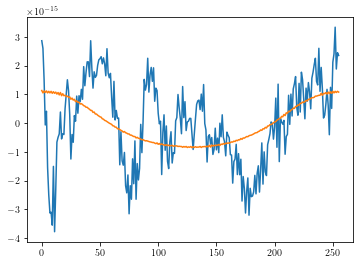

In [127]:
index_i = 4
index_j = 4

print(np.min(new_ref_gs_fdv[index_i,index_j]))
print(np.max(new_ref_gs_fdv[index_i,index_j]))

plt.plot(new_ref_gs_fdv[index_i,index_j]-1/256**0.5, color='tab:blue')
plt.plot(ref_state_fdv[index_i,index_j]-1/256**0.5, color='tab:orange')

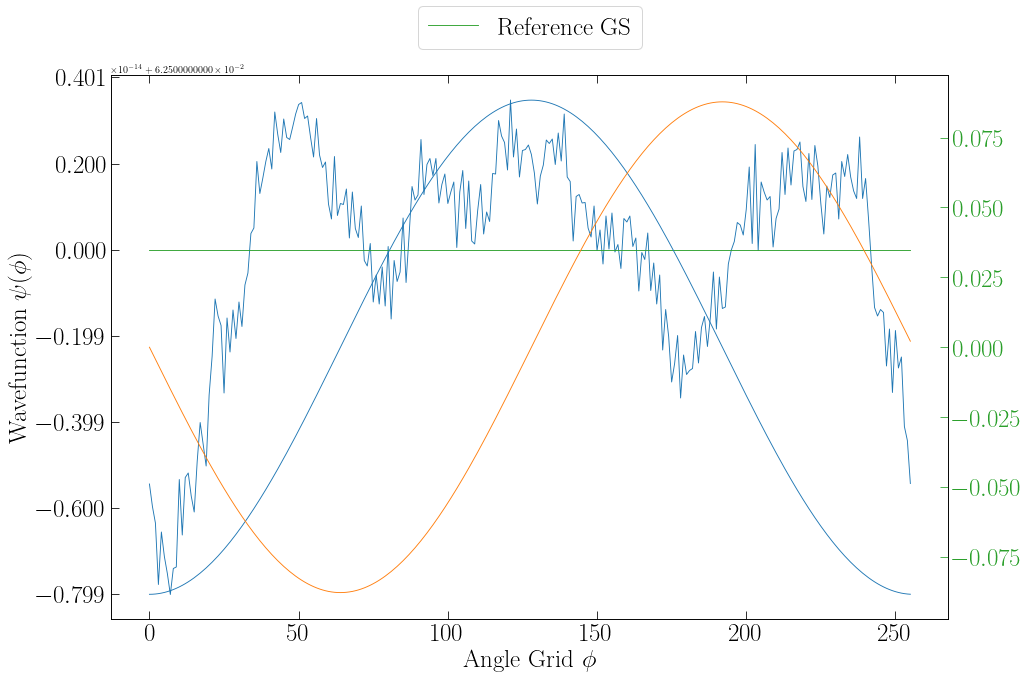

In [134]:
'''
choose the rotor index from which to display the excitation wavefunctions
'''
index_i = 2
index_j = 2

mult_ref_object.set_phase_bool = True

plot_comp_wf(ref_exc_states_fdv[index_i,index_j], mult_ref_object.set_phase(ref_state_fdv[index_i,index_j]), 3, '2_wavefunctions_rotor_fdv_01')


Densities of Reference States:


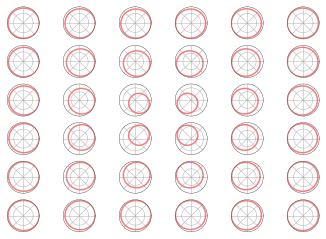

Densities of 1st Excited States:


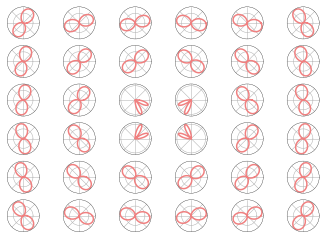

Densities of 2nd Excited States:


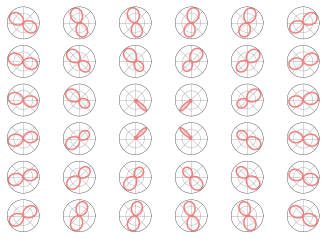

Density of 3rd Excited States:


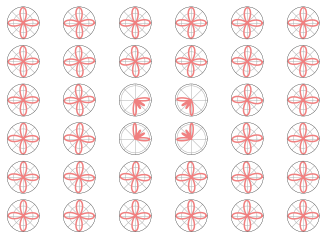

Densities of 4th Excited States:


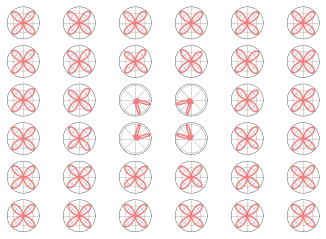

In [28]:
ref_state_to_plot = new_ref_gs.copy()
exc_ref_state = ref_exc_states.copy() 

exc_state_to_plot1 = ref_state_to_plot.copy()
exc_state_to_plot2 = ref_state_to_plot.copy()
exc_state_to_plot3 = ref_state_to_plot.copy()
exc_state_to_plot4 = ref_state_to_plot.copy()

for i in range(My):
    for j in range(Mx):
        exc_state_to_plot1[i,j] = exc_ref_state[i,j,1]
        exc_state_to_plot2[i,j] = exc_ref_state[i,j,2]
        exc_state_to_plot3[i,j] = exc_ref_state[i,j,3]
        exc_state_to_plot4[i,j] = exc_ref_state[i,j,4]

print('Densities of Reference States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(ref_state_to_plot)**2); plt.savefig(results_path+'ferro-order_ref.svg'); plt.show()
print('Densities of 1st Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot1)**2); plt.savefig(results_path+'ferro-order_1st.svg'); plt.show()
print('Densities of 2nd Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot2)**2); plt.savefig(results_path+'ferro-order_2nd.svg'); plt.show()
print('Density of 3rd Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot3)**2); plt.savefig(results_path+'ferro-order_3rd.svg'); plt.show()
print('Densities of 4th Excited States:')
plot_rotor_wavefunction(x, My, Mx, np.abs(exc_state_to_plot4)**2); plt.savefig(results_path+'ferro-order_4th.svg'); plt.show()

In [29]:
'''
Computes the energy of the new configuration if the (index_i,index_j)-th rotor is excited
'''
def total_state_exc_energies(index_i, index_j, exc_number, ref_fo, ref_fdv, ref_fdh, ref_sp, exc_fo, exc_fdv, exc_fdh, exc_sp):
    mult_ref_object.set_phase_bool = False

    E_arr_0 = np.zeros(exc_number, dtype=complex)
    E_arr_1 = np.zeros(exc_number, dtype=complex)
    E_arr_2 = np.zeros(exc_number, dtype=complex)
    E_arr_3 = np.zeros(exc_number, dtype=complex)
    for i in range(exc_number):
        psi_new_0 = ref_fo.copy()
        psi_new_1 = ref_fdv.copy()
        psi_new_2 = ref_fdh.copy()
        psi_new_3 = ref_sp.copy()

        psi_new_0[index_i,index_j] = mult_ref_object.set_phase(exc_fo[index_i,index_j,i])
        psi_new_1[index_i,index_j] = mult_ref_object.set_phase(exc_fdv[index_i,index_j,i])
        psi_new_2[index_i,index_j] = mult_ref_object.set_phase(exc_fdh[index_i,index_j,i])
        psi_new_3[index_i,index_j] = mult_ref_object.set_phase(exc_sp[index_i,index_j,i])

        E12_0, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi_new_0, q, psi_new_0, q)
        E12_1, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi_new_1, q, psi_new_1, q)
        E12_2, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi_new_2, q, psi_new_2, q)
        E12_3, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi_new_3, q, psi_new_3, q)
    
        #print(coupl_object.calc_hamiltonian_matrix_element(new_ref_gs_sp, q, psi_new_3, q)[0])

        E_arr_0[i] = E12_0
        E_arr_1[i] = E12_1
        E_arr_2[i] = E12_2
        E_arr_3[i] = E12_3

    return E_arr_0, E_arr_1, E_arr_2, E_arr_3

E-Scale = 1.0

E Rotor (1,1) = [-421.70354517+8.46692682e-19j -124.75107608-1.61345492e-16j
 -123.29567156+1.29818970e-16j -100.7067834 +4.41955800e-17j
  -98.85268051+4.59504368e-18j  -77.82403142+6.15308582e-16j
  -75.83255673+6.98807126e-16j  -56.19709634+4.86136809e-16j
  -54.22413602-1.15409293e-15j  -35.96131399-1.56906567e-16j
  -34.14630446-1.77112221e-15j]
E diff Rotor (1,1) = [296.95246909-1.62192185e-16j   1.45540452+2.91164462e-16j
  22.58888816-8.56233897e-17j   1.85410289-3.96005364e-17j
  21.02864909+6.10713539e-16j   1.99147469+8.34985439e-17j
  19.63546039-2.12670317e-16j   1.97296032-1.64022974e-15j
  18.26282203+9.97186363e-16j   1.81500953-1.61421565e-15j]

E Rotor (1,2) = [-421.70354517+8.65525640e-20j  -83.66621415-4.93445875e-17j
  -83.00686792-2.81235414e-18j  -80.74831548-2.68369781e-17j
  -80.74322816-7.28519086e-18j  -75.74816812-8.66803770e-17j
  -75.74807748-2.51117143e-16j  -68.74817332-7.55882517e-16j
  -68.74817029+3.20173954e-16j  -59.74817324-3.1209485

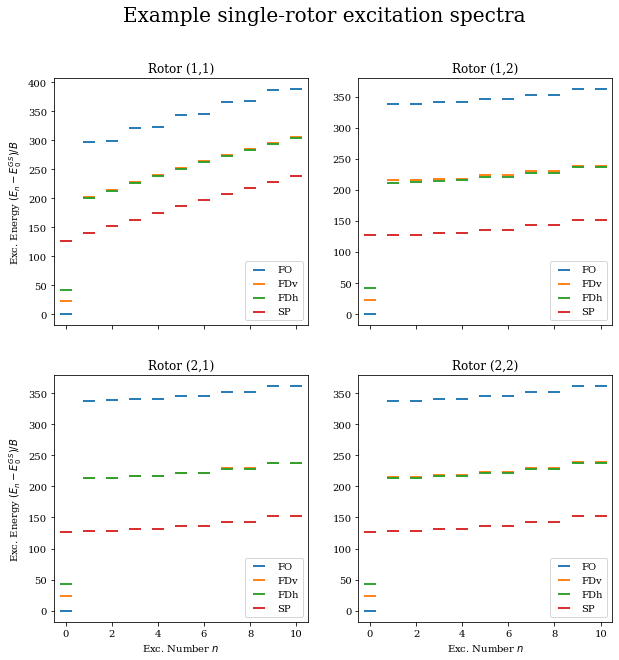

In [31]:
index_i1 = 0 # rotor index along My
index_j1 = 0 # rotor index along Mx

index_i2 = 0 # rotor index along My
index_j2 = 1 # rotor index along Mx

index_i3 = 1 # rotor index along My
index_j3 = 0 # rotor index along Mx

index_i4 = 1 # rotor index along My
index_j4 = 1 # rotor index along Mx

E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3 = total_state_exc_energies(index_i1, index_j1, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3 = total_state_exc_energies(index_i2, index_j2, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3 = total_state_exc_energies(index_i3, index_j3, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3 = total_state_exc_energies(index_i4, index_j4, exc_number, 
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)

scale = B
print('E-Scale =', scale)

print('\nE Rotor (1,1) =', E1_arr_0)
print('E diff Rotor (1,1) =', np.diff(E1_arr_0))

print('\nE Rotor (1,2) =', E2_arr_0)
print('E diff Rotor (1,2) =', np.diff(E2_arr_0))

print('\nE Rotor (2,1) =', E3_arr_0)
print('E diff Rotor (2,1) =', np.diff(E3_arr_0))

print('\nE Rotor (2,2) =', E4_arr_0)
print('E diff Rotor (2,2) =', np.diff(E4_arr_0))

E1_offset = np.min([E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3])
E2_offset = np.min([E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3])
E3_offset = np.min([E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3])
E4_offset = np.min([E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3])

print('\n E1 offset =', E1_offset)
print('E2 offset =', E2_offset)
print('E3 offset =', E3_offset)
print('E4 offset =', E4_offset)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(10,10)) 
gs = fig.add_gridspec(2,2, hspace=0.2, wspace=0.2)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Example single-rotor excitation spectra', fontsize=20)

axs[0,0].scatter(np.arange(exc_number), (E1_arr_0-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,0].scatter(np.arange(exc_number), (E1_arr_1-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,0].scatter(np.arange(exc_number), (E1_arr_2-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,0].scatter(np.arange(exc_number), (E1_arr_3-E1_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,1].scatter(np.arange(exc_number), (E2_arr_0-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,1].scatter(np.arange(exc_number), (E2_arr_1-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,1].scatter(np.arange(exc_number), (E2_arr_2-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,1].scatter(np.arange(exc_number), (E2_arr_3-E2_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,0].scatter(np.arange(exc_number), (E3_arr_0-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,0].scatter(np.arange(exc_number), (E3_arr_1-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,0].scatter(np.arange(exc_number), (E3_arr_2-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,0].scatter(np.arange(exc_number), (E3_arr_3-E3_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,1].scatter(np.arange(exc_number), (E4_arr_0-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,1].scatter(np.arange(exc_number), (E4_arr_1-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,1].scatter(np.arange(exc_number), (E4_arr_2-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,1].scatter(np.arange(exc_number), (E4_arr_3-E4_offset).real/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,0].legend(loc='lower right') 
axs[0,1].legend(loc='lower right') 
axs[1,0].legend(loc='lower right') 
axs[1,1].legend(loc='lower right') 

axs[0,0].set_title(r'Rotor (1,1)')
axs[0,1].set_title(r'Rotor (1,2)')
axs[1,0].set_title(r'Rotor (2,1)')
axs[1,1].set_title(r'Rotor (2,2)')

axs[0,0].set_ylabel(r'Exc. Energy $(E_n - E_0^{GS})/B$')
axs[1,0].set_ylabel(r'Exc. Energy $(E_n - E_0^{GS})/B$')
axs[1,0].set_xlabel(r'Exc. Number $n$')
axs[1,1].set_xlabel(r'Exc. Number $n$')

plt.savefig(results_path+'single-excitation_energies_total_configuration.svg')

In [32]:
'''
Computes the coupling of the new configuration if the (index_i,index_j)-th rotor is excited
'''
def coupling_state_with_exc_energies(index_i, index_j, exc_number, couple_state, ref_fo, ref_fdv, ref_fdh, ref_sp, exc_fo, exc_fdv, exc_fdh, exc_sp):
    mult_ref_object.set_phase_bool = False

    E_arr_0 = np.zeros(exc_number, dtype=complex)
    E_arr_1 = np.zeros(exc_number, dtype=complex)
    E_arr_2 = np.zeros(exc_number, dtype=complex)
    E_arr_3 = np.zeros(exc_number, dtype=complex)
    for i in range(exc_number):
        psi_new_0 = ref_fo.copy()
        psi_new_1 = ref_fdv.copy()
        psi_new_2 = ref_fdh.copy()
        psi_new_3 = ref_sp.copy()

        psi_new_0[index_i,index_j] = mult_ref_object.set_phase(exc_fo[index_i,index_j,i])
        psi_new_1[index_i,index_j] = mult_ref_object.set_phase(exc_fdv[index_i,index_j,i])
        psi_new_2[index_i,index_j] = mult_ref_object.set_phase(exc_fdh[index_i,index_j,i])
        psi_new_3[index_i,index_j] = mult_ref_object.set_phase(exc_sp[index_i,index_j,i])

        E12_0, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_0, q)
        E12_1, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_1, q)
        E12_2, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_2, q)
        E12_3, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(couple_state, q, psi_new_3, q)

        E_arr_0[i] = E12_0
        E_arr_1[i] = E12_1
        E_arr_2[i] = E12_2
        E_arr_3[i] = E12_3

    return E_arr_0, E_arr_1, E_arr_2, E_arr_3

E-Scale = 1.0

E Rotor (1,1) = [ 2.57901386-5.28612015e-13j  1.41742392+1.15007483e-12j
 -0.11476733+1.61631263e-13j  1.01939565+1.31310175e-12j
  0.38600536-2.43174091e-13j -0.60299803-3.85454063e-13j
 -0.47758359+1.25948781e-13j -0.27865725-2.93745291e-12j
  0.45724038-5.05711210e-14j  0.05932596-1.28859172e-13j
 -0.38689662+8.94284297e-14j]
E diff Rotor (1,1) = [-1.16158994+1.67868684e-12j -1.53219125-9.88443562e-13j
  1.13416298+1.15147049e-12j -0.63339029-1.55627584e-12j
 -0.98900339-1.42279972e-13j  0.12541443+5.11402844e-13j
  0.19892634-3.06340169e-12j  0.73589763+2.88688179e-12j
 -0.39791441-7.82880510e-14j -0.44622258+2.18287602e-13j]

E Rotor (1,2) = [ 2.57901420e+00-5.28615519e-13j  1.67977803e+00+4.27757287e-13j
  1.08186205e+00-1.55660326e-13j  1.32296170e+00+7.11624221e-13j
  1.95664383e-02-5.15139738e-12j  2.10636864e-01+6.93392982e-11j
 -2.84822015e-01-1.79701924e-10j  8.49294212e-03+1.03253504e-08j
 -9.30759700e-02-2.39018948e-09j -1.87170077e-03+5.82440122e-09j
  1.1

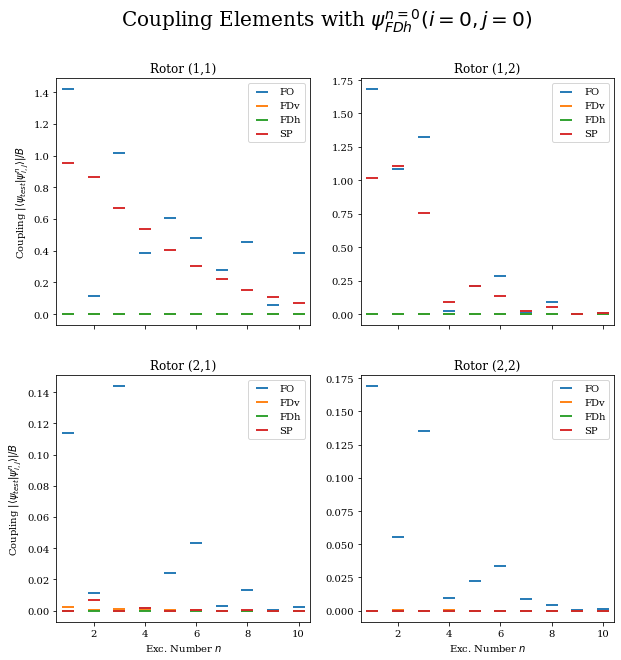

In [43]:
index_i1 = 0 # rotor index along My
index_j1 = 0 # rotor index along Mx

index_i2 = 0 # rotor index along My
index_j2 = 1 # rotor index along Mx

index_i3 = 1 # rotor index along My
index_j3 = 0 # rotor index along Mx

index_i4 = 1 # rotor index along My
index_j4 = 1 # rotor index along Mx

state_to_couple = new_ref_gs_fdh

E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3 = coupling_state_with_exc_energies(index_i1, index_j1, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3 = coupling_state_with_exc_energies(index_i2, index_j2, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3 = coupling_state_with_exc_energies(index_i3, index_j3, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)
E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3 = coupling_state_with_exc_energies(index_i4, index_j4, exc_number, state_to_couple,
                                        new_ref_gs, new_ref_gs_fdv, new_ref_gs_fdh, new_ref_gs_sp, 
                                        ref_exc_states, ref_exc_states_fdv, ref_exc_states_fdh, ref_exc_states_sp)

scale = B
print('E-Scale =', scale)

print('\nE Rotor (1,1) =', E1_arr_0)
print('E diff Rotor (1,1) =', np.diff(E1_arr_0))

print('\nE Rotor (1,2) =', E2_arr_0)
print('E diff Rotor (1,2) =', np.diff(E2_arr_0))

print('\nE Rotor (2,1) =', E3_arr_0)
print('E diff Rotor (2,1) =', np.diff(E3_arr_0))

print('\nE Rotor (2,2) =', E4_arr_0)
print('E diff Rotor (2,2) =', np.diff(E4_arr_0))

E1_offset = 0 #np.min([E1_arr_0, E1_arr_1, E1_arr_2, E1_arr_3])
E2_offset = 0 #np.min([E2_arr_0, E2_arr_1, E2_arr_2, E2_arr_3])
E3_offset = 0 #np.min([E3_arr_0, E3_arr_1, E3_arr_2, E3_arr_3])
E4_offset = 0 #np.min([E4_arr_0, E4_arr_1, E4_arr_2, E4_arr_3])

print('\n E1 offset =', E1_offset)
print('E2 offset =', E2_offset)
print('E3 offset =', E3_offset)
print('E4 offset =', E4_offset)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('font', family='serif')

fig = plt.figure(figsize=(10,10)) 
gs = fig.add_gridspec(2,2, hspace=0.2, wspace=0.2)
axs = gs.subplots(sharex=True)

plt.suptitle(r'Coupling Elements with $\psi_{FDh}^{n=0}(i=0,j=0)$', fontsize=20)

axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_0-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_1-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_2-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,0].scatter(np.arange(exc_number-1)+1, np.abs(E1_arr_3-E1_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_0-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_1-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_2-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[0,1].scatter(np.arange(exc_number-1)+1, np.abs(E2_arr_3-E2_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_0-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_1-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_2-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,0].scatter(np.arange(exc_number-1)+1, np.abs(E3_arr_3-E3_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_0-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FO')
axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_1-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDv')
axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_2-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'FDh')
axs[1,1].scatter(np.arange(exc_number-1)+1, np.abs(E4_arr_3-E4_offset)[1:exc_number]/scale, marker="_", s=130, linewidth=1.9, label=r'SP')

axs[0,0].legend(loc='upper right') 
axs[0,1].legend(loc='upper right') 
axs[1,0].legend(loc='upper right')
axs[1,1].legend(loc='upper right') 

axs[0,0].set_title(r'Rotor (1,1)')
axs[0,1].set_title(r'Rotor (1,2)')
axs[1,0].set_title(r'Rotor (2,1)')
axs[1,1].set_title(r'Rotor (2,2)')

axs[0,0].set_ylabel(r'Coupling $|\langle\psi_{test}|\psi_{i,j}^n\rangle|/B$')
axs[1,0].set_ylabel(r'Coupling $|\langle\psi_{test}|\psi_{i,j}^n\rangle|/B$')
axs[1,0].set_xlabel(r'Exc. Number $n$')
axs[1,1].set_xlabel(r'Exc. Number $n$')

plt.savefig(results_path+'coupling_horizontal_ferro-domain_gs_with_excited_states_total_configuration.svg')

In [11]:
def create_patch_excitation(psi_ref, psi_exc_states, multi_ref_object):
    psi = psi_ref.copy()

    psi[0,0] = multi_ref_object.set_phase(psi_exc_states[0,0,1]) 
    psi[5,0] = multi_ref_object.set_phase(psi_exc_states[5,0,1]) 
    psi[0,5] = multi_ref_object.set_phase(psi_exc_states[0,5,1]) 
    psi[5,5] = multi_ref_object.set_phase(psi_exc_states[5,5,1]) 

    psi[0,1] = multi_ref_object.set_phase(psi_exc_states[0,1,1]) 
    psi[5,1] = multi_ref_object.set_phase(psi_exc_states[5,1,1]) 
    psi[0,4] = multi_ref_object.set_phase(psi_exc_states[0,4,1]) 
    psi[5,4] = multi_ref_object.set_phase(psi_exc_states[5,4,1]) 

    psi[1,0] = multi_ref_object.set_phase(psi_exc_states[1,0,1]) 
    psi[4,0] = multi_ref_object.set_phase(psi_exc_states[4,0,1]) 
    psi[1,5] = multi_ref_object.set_phase(psi_exc_states[1,5,1]) 
    psi[4,5] = multi_ref_object.set_phase(psi_exc_states[4,5,1]) 


    return psi

def create_wall_excitation(psi_ref, psi_exc_states, multi_ref_object):
    psi = psi_ref.copy()

    psi[0,0] = multi_ref_object.set_phase(psi_exc_states[0,0,1]) 
    psi[1,0] = multi_ref_object.set_phase(psi_exc_states[1,0,1]) 
    psi[2,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[3,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[4,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[5,0] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 

    return psi

def create_wall_excitation_1(psi_ref, psi_exc_states, multi_ref_object):
    psi = psi_ref.copy()

    psi[0,-1] = multi_ref_object.set_phase(psi_exc_states[0,0,1]) 
    psi[1,-1] = multi_ref_object.set_phase(psi_exc_states[1,0,1]) 
    psi[2,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[3,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[4,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 
    psi[5,-1] = multi_ref_object.set_phase(psi_exc_states[2,0,1]) 

    return psi

In [26]:
psi_arr = []

psi_arr.append(new_ref_gs)
#psi_arr.append(new_ref_gs_fdv)
#psi_arr.append(new_ref_gs_fdh)
psi_arr.append(new_ref_gs_sp)

psi_arr_s = []
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs, psi_arr, ref_exc_states)
#psi_arr_s = mult_ref_object.append_single_excitation(new_ref_gs_fdv, psi_arr_s, ref_exc_states_fdv)
#psi_arr_s = mult_ref_object.append_single_excitation(new_ref_gs_fdh, psi_arr_s, ref_exc_states_fdh)
psi_arr = mult_ref_object.append_single_excitation(new_ref_gs_sp, psi_arr, ref_exc_states_sp)

psi_arr_d = []
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs, psi_arr_d, ref_exc_states)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_fdv, psi_arr_d, ref_exc_states_fdv)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_fdh, psi_arr_d, ref_exc_states_fdh)
#psi_arr_d = mult_ref_object.append_double_excitations(new_ref_gs_sp, psi_arr_d, ref_exc_states_sp)

n_states = len(psi_arr)
q_arr = np.zeros((n_states,2), dtype=complex)

n_states_s = len(psi_arr_s)
q_arr_s = np.zeros((n_states_s,2), dtype=complex)

n_states_d = len(psi_arr_d)
q_arr_d = np.zeros((n_states_d,2), dtype=complex)

print(n_states)
print(n_states_s)
print(n_states_d)

362
0
0


(1.0594579035161291e-12+1.0034413037265903e-14j)
(-398.7092751160513-3.865500922557905e-17j)
(-206.34380157693528-2.670666872959952e-17j)


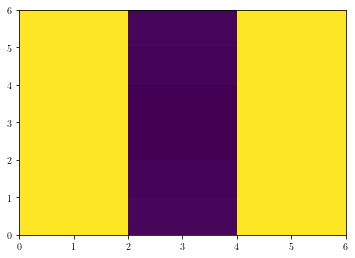

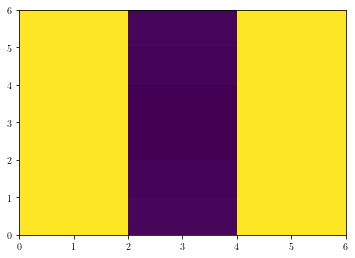

In [25]:
psi1 = psi_arr[1] #create_wall_excitation(new_ref_gs, ref_exc_states, mult_ref_object) # psi_arr_s[0]
psi2 = new_ref_gs_fdv.copy() #create_wall_excitation(new_ref_gs, ref_exc_states, mult_ref_object) # psi_arr_s[360]
psi2[2,4] = ref_exc_states_fdv[2,4,2]

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi1, q, psi2, q)
print(E12)

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi1, q, psi1, q)
print(E12)

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(psi2, q, psi2, q)
print(E12)

ref_state_sigma = polaron_size_object.calc_polaron_size(psi1, '1')
plt.pcolormesh(ref_state_sigma)
plt.show()

ref_state_sigma = polaron_size_object.calc_polaron_size(psi2, '1')
plt.pcolormesh(ref_state_sigma)
plt.show()

In [27]:
h_eff, s_ove = coupl_object.calc_hamiltonian(n_states, psi_arr, q_arr)

In [28]:
print(np.min(s_ove))
print(np.max(s_ove))

(-0.22866973740001606-1.0040140324850713e-11j)
(1.0000000005724459+0j)


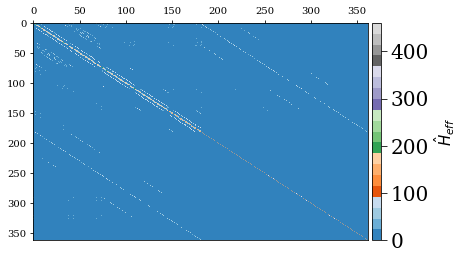

In [29]:
%matplotlib inline
fig = plt.figure() 
ax = plt.gca() 

pc = plt.pcolormesh(np.abs(h_eff), cmap='tab20c')

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(pc, cax=cax)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=15)

ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.savefig('h_eff_fo_sp_30_excitations.png', dpi=400)

In [30]:
eigen_values, eigen_vector = scipy.linalg.eig(a=h_eff, b=s_ove) # diagonalize effective hamiltonian
order = np.argsort(eigen_values)
eigen_vector = eigen_vector[:,order]
eigen_values = eigen_values[order]

print(h_eff.shape)
print(np.min(h_eff))
print(np.max(h_eff))
print('min e-val =', np.min(eigen_values))

(362, 362)
(-460.2845808235364-2.7519899195127255e-18j)
(90.11020533642616+2.3645315748413835e-07j)
min e-val = (-463.57057304438365-6.901097726896437e-14j)


In [93]:
print(np.argwhere(h_eff == np.max(h_eff)))
print(h_eff[504,474])

[[504 474]]
(89.57367187971685-7.242957374632301e-07j)


[ 45  61  63  65  64 197 202 203 204 205 207 208 209 210 211 212 213 214
 251 253 255 256 254 257 264 265 267 269 272 271 273 270 274 275 277 278
 276 279 280 282 284 285 286 283 281 287 288 289 291 290 292 293 294 296
 295 299 300 298 304 303 305 302 306 314 315 312 313 307 309 311 310 308
 301 297 250 249 252 258 261 262 263 260 259 266 268 318 319 320 317 316
 324 323 321 322 326 327 328 330 332 331 329 335 334 336 338 337 333 339
 340 341 342 344 346 345 343 348 349 347 350 351 353 352 354 356 359 358
 360 361 357 355 325 215 216 217 218 219 220 221 222 224 225 226 227 228
 230 231 229 232 233 234 235 236 237 238 239 240 241 243 242 244 245 246
 247 248 223 206 201 200 199 198 196 195 194 193 192 191 190 189 188 187
 185 186 184 180 182 183 181 178 179 177 176 175 174 173 172 167 168 169
 170 171 166 163 165 164 162 161 160 148 149 155 156 150 159 158 157 154
 152 153 151 147 146 144 145 143 142 141 140 137 138 139 136 135 134 133
 132 131 130 129 128 127 126 124 125 119 123 120 12

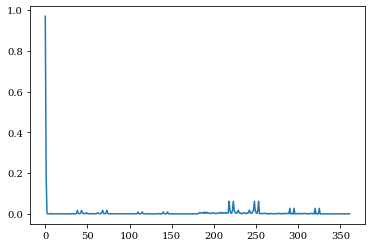

IndexError: index 752 is out of bounds for axis 0 with size 362

In [31]:
print(order)
#psi_arr = psi_arr[order]

psi_exc_n = diag_object.get_state_i(eigen_vector, 0)
norm = np.sum(np.abs(psi_exc_n*psi_exc_n))
print(norm)
print(np.min(h_eff@psi_exc_n-eigen_values[0]*s_ove@psi_exc_n))
print(np.max(h_eff@psi_exc_n-eigen_values[0]*s_ove@psi_exc_n))

print(np.argmax(np.abs(psi_exc_n)))
print(psi_exc_n[np.argmax(np.abs(psi_exc_n))])
print(psi_exc_n[1])

psi_gs_test = np.zeros(new_ref_gs.shape, dtype=complex)
norm_test = 0
for i in range(n_states):
    psi_gs_test += psi_exc_n[i]*psi_arr[i]
    norm_test += np.sum(np.abs(psi_exc_n[i]*psi_arr[i])**2)
    #print(np.sum(np.abs(psi_exc_n[i]*psi_arr[i])**2))

overlap_gs_test = coupl_object.calc_overlap(psi_gs_test, psi_gs_test)
#norm_test = np.sum(np.abs(psi_gs_test[3,3])**2)
print(norm_test)
print(overlap_gs_test)

%matplotlib inline
plt.plot(np.abs(psi_exc_n))
plt.show()

ref_state_sigma = polaron_size_object.calc_polaron_size(psi_exc_n[752]*psi_arr[752], '1')
plt.pcolormesh(ref_state_sigma)
plt.show()

plt.plot(psi_gs_test[5,5])
plt.plot(psi_arr[752][0,0])

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


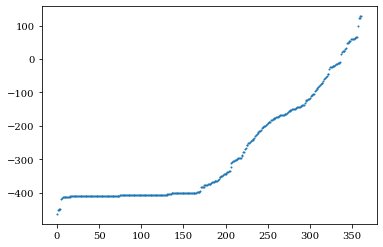

In [32]:
%matplotlib inline
plt.scatter(np.arange(len(eigen_values)), eigen_values, s=1)

In [ ]:
E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(new_ref_gs, q, new_ref_gs, q)
print(E12)

(-421.70353653457187+4.0765696204895404e-19j)


### Create the new reference configuration from the diagonalization to ensure orthogonality!

In [ ]:
#new_ferro_gs = np.zeros((My,Mx,n), dtype=complex)

#for i in range(My):
#    for j in range(Mx):
#        new_ferro_gs[i,j] = psi_exc_states[i,j,0]
#        new_ferro_gs[i,j] = set_phase(new_ferro_gs[i,j], n) #np.sign(np.sum((1/(n)**0.5)*new_ferro_gs[i,j]))*new_ferro_gs[i,j]

#new_ferro_order_sigma = polaron_size_object.calc_polaron_size(new_ferro_gs, '1')
#plt.pcolormesh(new_ferro_order_sigma)

Demonstrate that 1st excited states are orthogonal to the new ground state reference

In [ ]:
index_i1 = 3
index_j1 = 4

index_i1_1 = 7
index_j1_1 = 2

index_i2 = 4
index_j2 = 4

index_i2_2 = 7
index_j2_2 = 2

n_excited_state = 1

full_exc_sample_wf = new_ferro_gs.copy()
full_exc_sample_wf[index_i1,index_j1] = set_phase(psi_exc_states[index_i1,index_j1,n_excited_state], n)
full_exc_sample_wf[index_i1_1,index_j1_1] = set_phase(psi_exc_states[index_i1_1,index_j1_1,n_excited_state], n)

full_exc_sample_wf2 = new_ferro_gs.copy()
full_exc_sample_wf2[index_i2,index_j2] = set_phase(psi_exc_states[index_i2,index_j2,n_excited_state], n)
full_exc_sample_wf2[index_i2_2,index_j2_2] = set_phase(psi_exc_states[index_i2_2,index_j2_2,n_excited_state], n)

overlap = coupl_object.calc_overlap(new_ferro_gs, full_exc_sample_wf)
E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(new_ferro_gs, np.array([0,0]), full_exc_sample_wf, np.array([0,0]))
print("Overlap Excitation with RF configuration =", overlap)
print("Coupling term <psi_RF|H|psi_EX>: ", E12, "\n")

E12, E_T12, E_B12, E_V12 = coupl_object.calc_hamiltonian_matrix_element(full_exc_sample_wf, np.array([0,0]), full_exc_sample_wf2, np.array([0,0]))
print("Coupling term <psi_RF|H|psi_EX>: ", E12, "\n")
overlap = coupl_object.calc_overlap(full_exc_sample_wf, full_exc_sample_wf2)
print("Overlap new ferro RF and old ferro order RF configuration =", overlap)

overlap = coupl_object.calc_overlap(new_ferro_gs, ferro_order)
print("Overlap new ferro RF and old ferro order RF configuration =", overlap)

NameError: name 'new_ferro_gs' is not defined

Demonstrate the location of the excitation

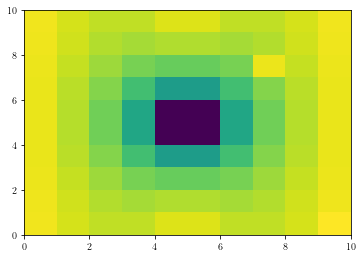

In [ ]:
new_ferro_order_sigma = polaron_size_object.calc_polaron_size(full_exc_sample_wf2, '1')
plt.pcolormesh(new_ferro_order_sigma[::-1,::])

#plt.plot(full_exc_sample_wf[0,0])

### Create the wavefunction list containing all single-rotor excitations

In [ ]:
psi_arr = []

psi_arr.append(new_ferro_gs)

for m in range(1,exc_number):
    print("m", m)
    for i in range(My):
        for j in range(Mx):
            psi = new_ferro_gs.copy()
            psi[i,j] = set_phase(psi_exc_states[i,j,m], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]

            psi_arr.append(psi)

index_list_rotor_1, index_list_rotor_2 = get_double_rotor_excitation_list(My, Mx)
inter_combinations = len(index_list_rotor_1)

for m1 in range(1,exc_number):
    for m2 in range(1,exc_number):
        for i in range(inter_combinations):
            index_rotor_1 = index_list_rotor_1[i]
            index_rotor_2 = index_list_rotor_2[i]

            psi = new_ferro_gs.copy()
            psi[index_rotor_1[0],index_rotor_1[1]] = set_phase(psi_exc_states[index_rotor_1[0],index_rotor_1[1],m1], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]
            psi[index_rotor_2[0],index_rotor_2[1]] = set_phase(psi_exc_states[index_rotor_2[0],index_rotor_2[1],m2], n) #np.sign(np.sum((1/(n)**0.5)*psi_exc_states[i,j,m]))*psi_exc_states[i,j,m] # psi_exc_states[i,j,n]

            psi_arr.append(psi)

n_states = len(psi_arr)
q_arr = np.zeros((n_states,2), dtype=complex)

print("No. of states =", n_states)

h_eff, s_ove = coupl_object.calc_hamiltonian(n_states, psi_arr, q_arr)
print("Finished calculation of Hamiltonian!")

m 1
No. of states = 5051


KeyError: 'n_states'

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


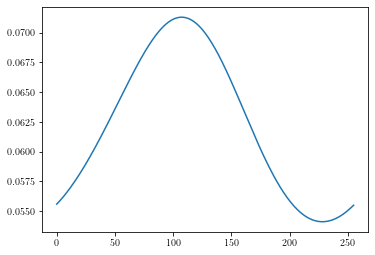

In [ ]:
plt.plot(psi_arr[0][0,0])

-1.2789769243681803e-13
1.2789769243681803e-13
-7.130764943871966e-16
7.082272611231832e-16


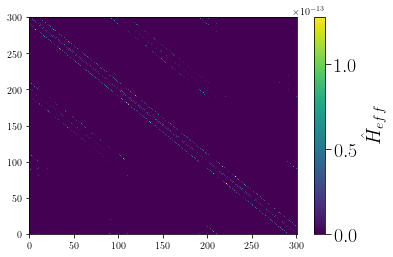

In [ ]:
%matplotlib inline
check = np.conjugate(h_eff.T)-h_eff

print(np.min(check.real))
print(np.max(check.real))

print(np.min(check.imag))
print(np.max(check.imag))

fig = plt.figure()
pc = plt.pcolormesh(np.abs(check)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=20)

In [ ]:
e_vals, e_kets, s_e_vec = coupl_object.diag_hamiltonian(h_eff, s_ove)

(301, 301)
5.636519353268774e-08
(array([0]),)
[[-0.99999988+5.80587997e-11j]]


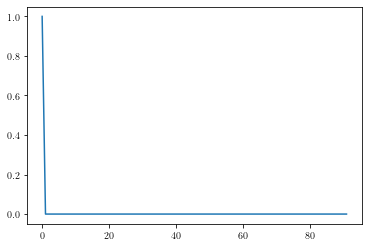

In [ ]:
print(e_kets.shape)
print(np.sum(np.abs(e_kets[0,1])**2))
plt.plot(np.arange(92), np.abs(e_kets[0:92,0])**2)
print(np.where(np.abs(e_kets[:, 0])**2 > 1e-6))
print(e_kets[np.where(np.abs(e_kets[:, 0])**2 > 1e-6), 0])

Max e-vals = 274.5057800509657
Min e-vals = -307.9659728330046


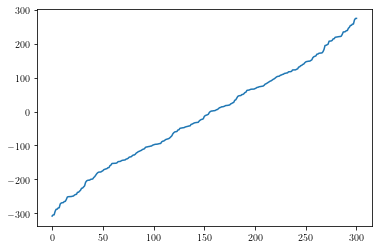

In [ ]:
plt.plot(e_vals)
print("Max e-vals =", np.max(e_vals))
print("Min e-vals =", np.min(e_vals))

(array([ 3.,  3.,  2.,  6.,  6.,  5.,  4.,  4.,  2.,  8.,  3.,  9.,  4.,
        10.,  9.,  6.,  7.,  9., 11.,  6.,  3.,  6., 11.,  8.,  5.,  5.,
         9., 10.,  6.,  3.,  7.,  6., 13.,  6.,  6.,  8., 12.,  4.,  6.,
         6.,  6.,  5.,  1.,  4.,  6.,  8.,  5.,  2.,  4.,  3.]),
 array([-307.96597283, -296.31653778, -284.66710272, -273.01766766,
        -261.3682326 , -249.71879754, -238.06936249, -226.41992743,
        -214.77049237, -203.12105731, -191.47162226, -179.8221872 ,
        -168.17275214, -156.52331708, -144.87388203, -133.22444697,
        -121.57501191, -109.92557685,  -98.27614179,  -86.62670674,
         -74.97727168,  -63.32783662,  -51.67840156,  -40.02896651,
         -28.37953145,  -16.73009639,   -5.08066133,    6.56877372,
          18.21820878,   29.86764384,   41.5170789 ,   53.16651396,
          64.81594901,   76.46538407,   88.11481913,   99.76425419,
         111.41368924,  123.0631243 ,  134.71255936,  146.36199442,
         158.01142947,  169.66086453

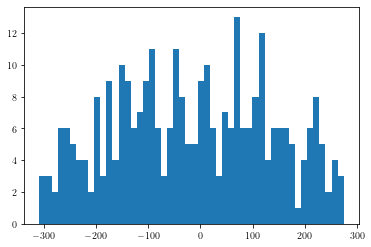

In [ ]:
plt.hist(e_vals, bins=50)
#plt.xlim(-0.5e25,0.5e25)

0.04993726380265718
(-0.002331400992079055+5.668912157137587e-15j)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


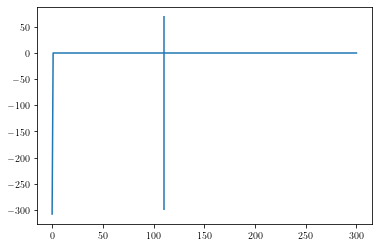

In [ ]:
%matplotlib inline
plt.plot(h_eff[0])
print(np.max(np.abs(h_eff)[0][1:201]))
print(h_eff[0,111])
plt.vlines(x=110, ymin=-300, ymax=70)

In [ ]:
%matplotlib qt
fig = plt.figure()
pc = plt.pcolormesh(np.abs(h_eff)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{H}_{eff}$', size=20)

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


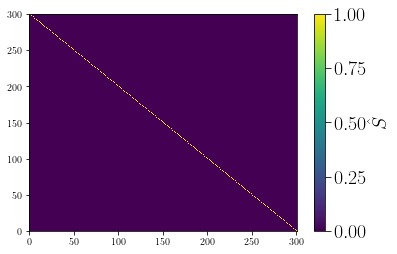

In [ ]:
%matplotlib inline
fig = plt.figure()
pc = plt.pcolormesh(np.abs(s_ove)[::-1,::])
cbar = fig.colorbar(pc)
cbar.ax.tick_params(labelsize=20, length=6)
cbar.set_label(label=r'$\hat{S}$', size=20)

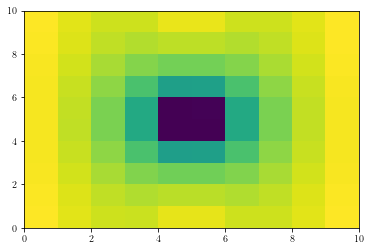

In [ ]:
new_ferro_order_sigma = polaron_size_object.calc_polaron_size(psi_arr[105], '1')
plt.pcolormesh(new_ferro_order_sigma)

In [ ]:
np.sum(psi_arr[160]-psi_arr[105])

(0.012063721103999114-2.0679515313825692e-25j)

In [ ]:
import scipy
scipy.linalg.eig(np.ones((10,10)))

(array([ 0.+0.j, 10.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j]),
 array([[-9.48683298e-01,  3.16227766e-01, -5.55111512e-18,
         -5.55111512e-18, -5.55111512e-18, -5.55111512e-18,
         -5.55111512e-18, -5.55111512e-18, -5.55111512e-18,
         -5.55111512e-18],
        [ 1.05409255e-01,  3.16227766e-01, -3.33333333e-01,
         -3.33333333e-01, -3.33333333e-01, -3.33333333e-01,
         -3.33333333e-01, -3.33333333e-01, -3.33333333e-01,
         -3.33333333e-01],
        [ 1.05409255e-01,  3.16227766e-01,  9.16666667e-01,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02],
        [ 1.05409255e-01,  3.16227766e-01, -8.33333333e-02,
          9.16666667e-01, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02, -8.33333333e-02, -8.33333333e-02,
         -8.33333333e-02],
        [ 1.05409255e-01,  3.16227766e-01, -8.33333333e-02,
    

In [ ]:
index_list = [np.array([0,0])]

My = 4
Mx = 4 
iter = 0
for i in range(My):
    for j in range(Mx):
        for k in range(My):
            for p in range(Mx):
                index_arr = np.array([k,p])
                #if np.any(np.isin(index_arr, np.array([i,j]))) or np.any(np.isin(index_arr, np.array([j,i]))): # and (np.any(np.isin(index_list, index_arr)) or np.any(np.isin(index_list, index_arr[::1]))):
                if np.any(np.isin(index_arr, np.array([j,i]))) != False and k != p:
                    iter += 1  
                    index_list.append(index_arr)          

M = int(My*Mx)
print(M)
print(M*(M-1)/2)
print(iter)
#print(index_list)
print(len(index_list))

16
120.0
144
145


In [ ]:
index_list = []
index_mat = np.zeros((My,Mx,My,Mx,2), dtype=int)
iter_i_before = 1

for i in range(My):
    iter_j_before = 1
    for j in range(Mx):
        if iter_i_before > i and iter_j_before > j:
            index_arr = np.array([i,j])

            index_mat[i,j,k,p] = index_arr
            index_list.append(index_arr)
    
        iter_j_before += 1
        #for k in range(My):
        #    for p in range(Mx):
    iter_i_before += 1            

print(len(index_list))
print(index_list)
print(index_mat[0,0])
print(index_mat.shape)

16
[array([0, 0]), array([0, 1]), array([0, 2]), array([0, 3]), array([1, 0]), array([1, 1]), array([1, 2]), array([1, 3]), array([2, 0]), array([2, 1]), array([2, 2]), array([2, 3]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3])]
[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]
(4, 4, 4, 4, 2)


In [ ]:
index_list = [np.array([1,1])]
index_list = index_list.append(np.array([1,2]))
print(index_list)

np.isin(index_list, np.array([0,0]))

None


array(False)

In [ ]:
import numpy as np

In [ ]:
index_list_rotor_1, index_list_rotor_2 = get_double_rotor_excitation_list(My, Mx)

M = My*Mx
print(M*(M-1)/2)
print(len(index_list_rotor_1))
print(len(index_list_rotor_2))

4950.0
4950
4950


In [ ]:
print(len(index_list))
print(index_list)

4950
[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([1, 0]), array([1, 1]), array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([1, 6]), array([1, 7]), array([1, 8]), array([1, 9]), array([2, 0]), array([2, 1]), array([2, 2]), array([2, 3]), array([2, 4]), array([2, 5]), array([2, 6]), array([2, 7]), array([2, 8]), array([2, 9]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3]), array([3, 4]), array([3, 5]), array([3, 6]), array([3, 7]), array([3, 8]), array([3, 9]), array([4, 0]), array([4, 1]), array([4, 2]), array([4, 3]), array([4, 4]), array([4, 5]), array([4, 6]), array([4, 7]), array([4, 8]), array([4, 9]), array([5, 0]), array([5, 1]), array([5, 2]), array([5, 3]), array([5, 4]), array([5, 5]), array([5, 6]), array([5, 7]), array([5, 8]), array([5, 9]), array([6, 0]), array([6, 1]), array([6, 2]), array([6, 3]), array([6, 4]), array([6, 5]), array([6, 6]), arra

In [ ]:
(0,0)->(0,1),(0,0)->(1,0),(0,0)->(1,1)
(0,1)->(1,0),(0,1)->(1,1)
(1,0)->(1,1)

SyntaxError: invalid syntax (2176338191.py, line 1)

In [ ]:
iter = 0

for i in range(1,3):
    for j in range(1,3):
        iter += 1

print(iter)

4
